# 线性回归 之 最小二乘法 

In [5]:
import numpy as np
import pandas as pd

波士顿放假数据集字段书名
* CRIM 房屋所在镇犯罪率
* ZN 面积大于25000平方英尺住宅所占比例
* INDUS 房屋所在镇非零售区所占比例
* CHASS 房屋是否是位于河边的，河边为1，否则为0
* NOX 一氧化氮浓度
* RM 平均房间数量
* AGE 1940年前建成房屋所占的比例
* DIS 房屋距离波士顿五大就业中心的加权距离
* RAD 距离房屋最近的公路
* TAX 税收额度
* PTRATIO 房屋所在镇师生比例
* BLACK 计算公式： 1000*(房屋所在镇非美籍人口所在比例 - 0.63)**2
* LSTAT 弱势群体人口所占比例
* MEDV 房间平均价格

In [24]:
data = pd.read_csv(r"dataset/boston.csv")
# display(data)
data.info() # 可用来查看数据有没缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null int64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null int64
tax           506 non-null int64
ptratio       506 non-null float64
black         506 non-null float64
lstat         506 non-null float64
medv          506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [39]:
class LinearRegression:
    '''最下二乘法实现'''
    def fit(self, X, y):
        # 类数组类型，形如 [样本数量，特征数量]，特征矩阵
        X = np.asmatrix(X) 
        # 类数组类型，形如 [样本数量]
        y = np.asmatrix(y) 
        # 由于y是一维格式，而矩阵是二位格式，这里需要将y转为二维  
        # reshape(行数量, 列数量)。(-1,1)表示转换为n行1列
        y = y.reshape(-1, 1) 
        # 最小二乘法公式
        # ************核心*************
        self.w_ = (X.T * X).I * X.T * y 
    def predict(self, X):
        '''根据参数传递的样本X对数据进行预测
        Parameters
        -----
        X: 类数组类型：形状：[样本数量, 特征数量]
        
        Return 预测结果
        '''
        X = np.asmatrix(X.copy()) # 拷贝X并转为矩阵。为什么要copy呢？要求为数组对象的完整对象，不能是一部分
        result = X * self.w_ # fit中对w已经计算好，这里直接乘以X即可
        return np.array(result).ravel() # 转为数组，并将数组扁平化，转为一维
    

In [49]:
# 不考虑截距
t = data.sample(len(data),random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]
lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)**2)) # 求MSE
display(lr.w_) # 查看训练好的权重

16.89257506996268

matrix([[-2.25548227e-03],
        [-9.36187378e-02],
        [ 4.57218914e-02],
        [ 3.67703558e-03],
        [ 2.43746753e+00],
        [-2.96521997e+00],
        [ 5.61875896e+00],
        [-4.94763610e-03],
        [-8.73950002e-01],
        [ 2.49282064e-01],
        [-1.14626177e-02],
        [-2.50045098e-01],
        [ 1.49996195e-02],
        [-4.56440342e-01]])

In [56]:
# 考虑截距，增加全1的一列
t = data.sample(len(data), random_state=0)
# t["Intercept"] = 1 #此方法新增的一列在最后一列
new_columns = t.columns.insert(0, "Intercept")
# 重新安培列的顺序，设置0填充
t = t.reindex(columns=new_columns, fill_value=1)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]
lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)**2)) # 求MSE
display(lr.w_) # 查看训练好的权重

17.1018681608589

matrix([[ 4.02498625e+01],
        [-2.74427257e-03],
        [-1.10979116e-01],
        [ 4.32293333e-02],
        [ 9.03681121e-03],
        [ 2.05744578e+00],
        [-1.91879749e+01],
        [ 3.31129080e+00],
        [ 3.60479588e-03],
        [-1.42037452e+00],
        [ 4.04808653e-01],
        [-1.49919227e-02],
        [-8.64215948e-01],
        [ 8.37948723e-03],
        [-5.67927413e-01]])

In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False # 显示负号

No handles with labels found to put in legend.


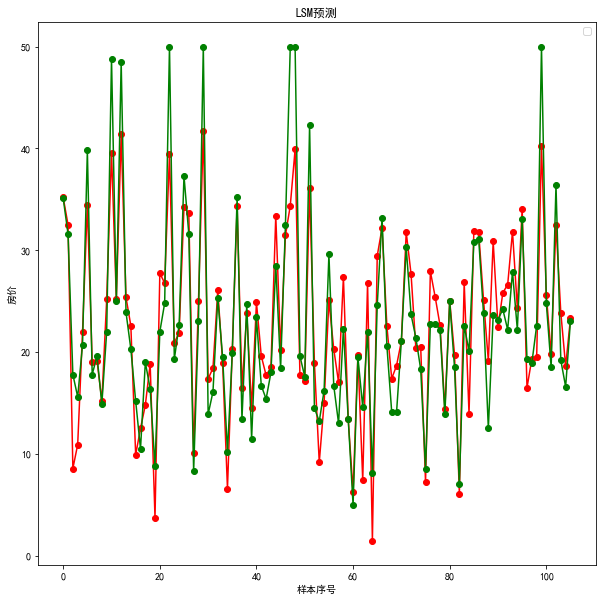

In [59]:
plt.figure(figsize=(10,10))
plt.plot(result, 'ro-')  # 红色圆圈表示"不带"权重鱼的预测值
plt.plot(test_y.values, 'go-') # 绿色圆圈表示测试集真实值
plt.title('LSM预测')
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.legend()
plt.show()